In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

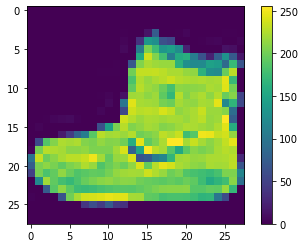

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

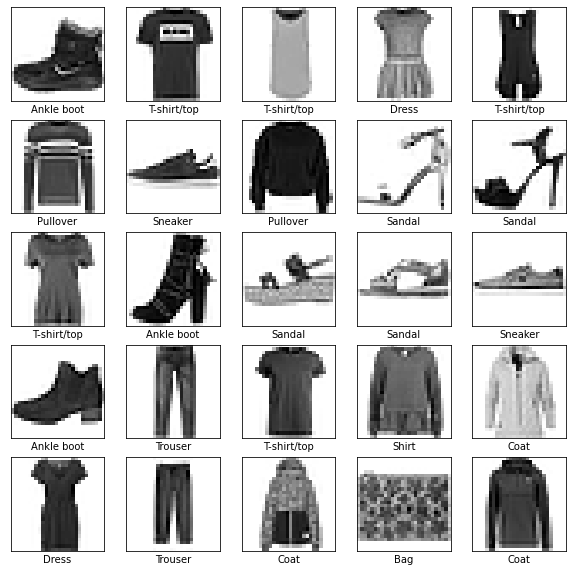

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.4986 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.3771 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.3387 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.3132 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.2953 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.2798 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.2682 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.2480 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 2s 870u

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)

313/313 [==============================] - 0s 641us/step - loss: 0.3331 - accuracy: 0.8858
Test accuracy: 0.8858000040054321


In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 574us/step


In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i,predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    
    

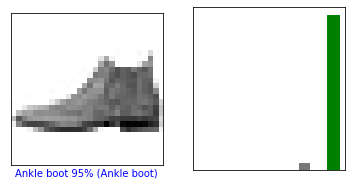

In [24]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

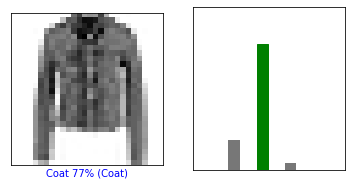

In [27]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

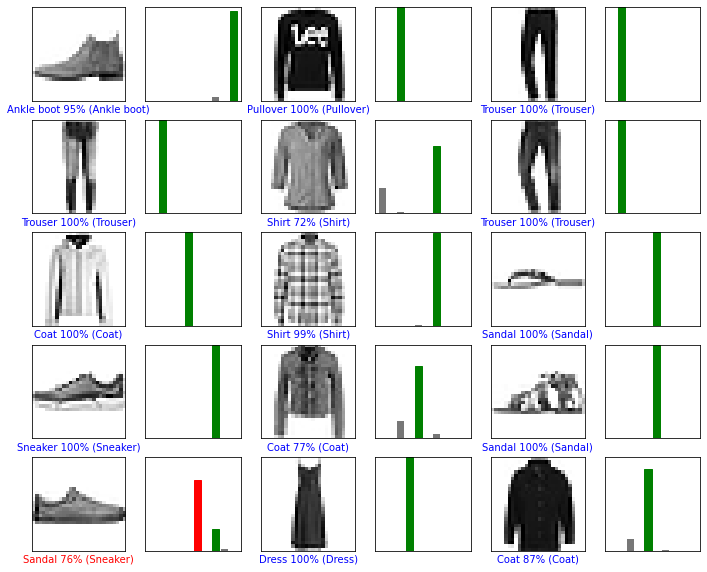

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [31]:
img=test_images[0]

In [32]:
img=(np.expand_dims(img,0))

In [33]:
predictions_single = model.predict(img)

1/1 [==============================] - 0s 13ms/step


In [34]:
print(predictions_single)

[[5.8175505e-07 2.8496086e-11 2.3919002e-09 1.9420550e-09 1.1103323e-08
  9.6392861e-05 1.4228073e-08 4.5669999e-02 1.2586549e-06 9.5423168e-01]]


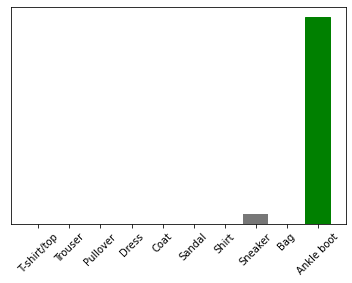

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

9